<a href="https://colab.research.google.com/github/code-with-mohitpal/AI-ML-data-science-python/blob/main/CSE273_Unit_2_Part_1_(Pandas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE273 UNIT-2 Part-1: **Working with Pandas**

## Learning Objectives for this Lecture:



* Understand the core concepts of Pandas Series/DataFrames.
* Learn how to import tabular datasets from external sources (CSV, Excel).
* Master techniques for inspecting, selecting and filtering subsets of data in DataFrames.
* Implement strategies for identifying and handling missing data.
* Visualization of data directly through Pandas dataframes

# **Introducing Pandas**

## **Pandas (Python Data Analysis Library)** Evolution:

* Built on NumPy.
* In Python, Pandas is not a strict acronym but a *portmanteau* derived from two key ideas:
  * **Panel Data**: a term in econometrics referring to multi-dimensional datasets involving observations over time for multiple entities.
  * **Python Data Analysis Library**: reflecting its purpose as a robust tool for data manipulation and analysis.
* It was created by **Wes McKinney** in **2008** to address the lack of efficient, flexible tools for handling structured data in Python.
  * The *first public release came in 2009*, and since then, Pandas has become a cornerstone of the data science ecosystem.


## **Key Features:**

* Handles tabular data (rows and columns) effortlessly.
* Powerful tools for reading/writing various data formats (CSV, Excel, SQL databases).
* Flexible indexing and selection.
* Robust features for missing data handling, data alignment, and merging.
* High performance.


---


* **Data Cleaning & Alignment** – Handle missing values and align datasets easily.
* **Aggregation & Grouping** – Summarize and transform data efficiently.
* **Time Series Support** – Resampling, shifting, and time-based indexing.
* **Integration with Visualization** – Works seamlessly with Matplotlib, Seaborn, etc., for quick plotting.

## **Core Objects:**

* **Series**: A one-dimensional labeled array.
  * Think of it like a single column from a spreadsheet or a SQL table.
  * The object type name: `<class 'pandas.core.series.Series'>`
* **DataFrame**: A two-dimensional labeled data structure with columns of potentially different types.
  * Think of it like a table with rows and columns headers!
  * The object type name: `<class 'pandas.core.frame.DataFrame'>`

---

For most data types, pandas uses `NumPy` arrays as the concrete objects contained with a `Index`, `Series`, or `DataFrame`.

For some data types, pandas extends `NumPy’s` type system.

## **Documentation Sources:**

Offical Documentation:
* https://pandas.pydata.org/pandas-docs/stable/index.html
* User Guide: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
* API Reference: https://pandas.pydata.org/pandas-docs/stable/reference/index.html


External Reference:
* Pandas Cheatsheet: https://www.dataquest.io/cheat-sheet/pandas-cheat-sheet/

## **Importing Pandas Library**

In [ ]:
# without an alias
import pandas

In [ ]:
# with an alias
import pandas as pd

## **Creating `Series` objects**

**Syntax**:

* `pandas.Series(data=None[, index=None, dtype=None, name=None, copy=None])`

**Parameters**:

* `data`: The input data for the Series. It can be a list, NumPy array, dictionary, scalar value, or another `Series`.
* `index`: Optional. Specifies the labels for the Series. If not provided, a default integer index is used.
* `dtype`: Optional. Defines the data type of the Series. If not specified, it is inferred from the data.
* `name`: Optional. Assigns a name to the Series.
* `copy`: Optional. If `True`, the input data is copied. Defaults to `False`.

### Create a simple data series

Syntax:
`pandas.Series([list of values])`

In [ ]:
# Create a Series object and print it.
cgpa = pd.Series([9.3, 6.4, 7.3, 5.7, 9.1])
print(cgpa)

0    9.3
1    6.4
2    7.3
3    5.7
4    9.1
dtype: float64


In [ ]:
print('type: ', type(cgpa))
print('dtype of values: ', cgpa.dtype)
print('no. of values or size: ', len(cgpa), 'or', cgpa.size)
print('index of cgpa: ', cgpa.index)
print('name of cgpa: ', cgpa.name)

type:  <class 'pandas.core.series.Series'>
dtype of values:  float64
no. of values:  5 or 5
index of cgpa:  RangeIndex(start=0, stop=5, step=1)
name of cgpa:  None


### Create a Named Data `Series` object

Syntax:
`pandas.Series([list of values], name='Series name')`

In [ ]:
# Create a Series object with a name and print it.
cgpa = pd.Series([9.3, 6.4, 7.3, 5.7, 9.1], name='CGPA of Students')
print(cgpa) # notice the name of series printed along with the data values

0    9.3
1    6.4
2    7.3
3    5.7
4    9.1
Name: CGPA of Students, dtype: float64


In [ ]:
# printing the name of series:
print('name: ', cgpa.name)

name:  CGPA of Students


### Create a named data `Series` with custom row indexes

Syntax:
`pandas.Series([list of values], name='Series name', index=[list of index values])`

In [ ]:
# Create a series object with custom index like a,b,c,...
cgpa1 = pd.Series([9.3, 6.4, 7.3, 5.7, 9.1], name='CGPA of Students', index=['a', 'b', 'c', 'd', 'e'])
print(cgpa1)

a    9.3
b    6.4
c    7.3
d    5.7
e    9.1
Name: CGPA of Students, dtype: float64


In [ ]:
# Create a series object with custom index like a,b,c. (error: when no of values in index does not match no. of values in series)
cgpa2 = pd.Series([9.3, 6.4, 7.3, 5.7, 9.1], name='CGPA of Students', index=['a', 'b', 'c']) # ValueError: Length of values (5) does not match length of index (3)
print(cgpa2)

ValueError: Length of values (5) does not match length of index (3)

In [ ]:
# Create a series with marks data of 5 students with the index representing thier roll nos. ranging from 101 to 105 (without using discrete list for index)
marks = pd.Series([10,20,30,40,50] , index = range(101,106))
print(marks)
# Note:
print('Index Range Start (inclusive):', marks.index.start)
print('Index Range Stop (exclusive):', marks.index.stop)
print('Index Range Step size:', marks.index.step)

101    10
102    20
103    30
104    40
105    50
dtype: int64
Index Range Start (inclusive): 101
Index Range Stop (exclusive): 106
Index Range Step size: 1


### Accessing individual elements of the `Series` object

Syntax:
* `objname[index_key]`

In [ ]:
# Access individual element of the Series object cgpa
cgpa = pd.Series([9.3, 6.4, 7.3, 5.7, 9.1])

# print 2nd element (index=1)
print(cgpa[1])

# print 4th element (index=3)
print(cgpa[3])

6.4
5.7


In [ ]:
# print the second last element (using negative index)
# print(cgpa[-2]) # KeyError: -2 not in range; valid index keys are 0,1,2,3,4
print(cgpa[cgpa.size-2])  # ok, cgpa.size-2 computes to 5-2 = 3;  prints cgpa[3] i.e. 5.7

5.7


In [ ]:
# print the cgpa of student with index 'b'
cgpa1 = pd.Series([9.3, 6.4, 7.3, 5.7, 9.1], name='CGPA of Students', index=['a', 'b', 'c', 'd', 'e'])

print(cgpa1['b']) # preferred approach; consistent with DataFrame approach
print('---------')
print(cgpa1[1]) # deprecated approach; not consistent with DataFrame approach


6.4
---------
6.4


/tmp/ipython-input-1677631145.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(cgpa1[1]) # deprecated approach


In [ ]:
# print the value of marks of roll no. 102 for the following series
marks = pd.Series([10,20,30,40,50] , index = range(101,106))

print(marks[102])

# print(x[1]) # KeyError: 1 not in range

print(marks[marks.index.start+1])


20
20
Index Range Start (inclusive): 101
Index Range Stop (exclusive): 106
Index Range Step size: 1


### Explore schema (metadata) info about the series object

Syntax:
* `objname.info()`

In [ ]:
print(marks.info())

<class 'pandas.core.series.Series'>
RangeIndex: 5 entries, 101 to 105
Series name: None
Non-Null Count  Dtype
--------------  -----
5 non-null      int64
dtypes: int64(1)
memory usage: 172.0 bytes
None


### Statistical operations on Series object

In [ ]:
print('Min: ', marks.max(), 'at index', marks.argmin())
print('Max: ', marks.max(), 'at index', marks.argmax())
print('Sum: ', marks.sum())
print('Product: ', marks.prod()) # or marks.product()
print('Mean: ', marks.mean())
print('Median: ', marks.median())
print('Mode: ', marks.mode())
print('Standard Deviation: ', marks.std())
print('Variance: ', marks.var())
print('Cumulative Sum:\n', marks.cumsum())
print('Cumulative Product:\n', marks.cumprod())
# Explore other functions yourself

Min:  50 at index 0
Max:  50 at index 4
Sum:  150
Product:  12000000
Mean:  30.0
Median:  30.0
Mode:  0    10
1    20
2    30
3    40
4    50
dtype: int64
Standard Deviation:  15.811388300841896
Variance:  250.0
Cumulative Sum:
 101     10
102     30
103     60
104    100
105    150
dtype: int64
Cumulative Product:
 101          10
102         200
103        6000
104      240000
105    12000000
dtype: int64


### The `describe()` fucntion can be used to display all basic statistics in one place

In [ ]:
print(marks.describe())

count     5.000000
mean     30.000000
std      15.811388
min      10.000000
25%      20.000000
50%      30.000000
75%      40.000000
max      50.000000
dtype: float64


## **Creating `DataFrame` objects**

**Syntax**:

* `panadas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)`

**Parameters**:

* `data`: The input data for the Dataframe. It can be a ndarray (structured or homogeneous), Iterable, dict, or another DataFrame.
* `index`: Optional. Index or array-like; Index to use for resulting frame. If not provided, a default RangeIndex(0, 1, 2, …, n) index is used.
* `columns`: Optional. Index or array-like; Column labels to use for resulting frame when data does not have them, defaulting to RangeIndex(0, 1, 2, …, n) is used.
* `dtype`: Optional. Defines the data type to force. Only a single dtype is allowed. If not specified, it is inferred from the data.
* `name`: Optional. Assigns a name to the Series.
* `copy`: Optional.
  * If `True`, the input data is copied.
  * If data is a dict containing one or more Series (possibly of different dtypes), `copy=False` will ensure that these inputs are not copied.
  * For dict data,default of `None` behaves like `copy=True`.
  * For DataFrame or 2d ndarray input, the default of `None` behaves like `copy=False`.

In [ ]:
# consider the dictionary
stu_data = { 'roll': [11, 7, 25, 16, 10, 8, 15],
         'name': ['pranav', 'raman', 'sumit', 'suman', 'nitin', 'amit', 'aman'],
         'place':['jal', 'phg', 'kpt', 'del', 'del', 'jal', 'jal'],
         'marks':[88, 80, 79, 99, 15, 10, 40] }  #ensure that no. of values in each list must be same.

# create a DataFrame using Dictionary of Key-Values_lists
stu_df = pd.DataFrame(stu_data)
print(stu_df)

   roll    name place  marks
0    11  pranav   jal     88
1     7   raman   phg     80
2    25   sumit   kpt     79
3    16   suman   del     99
4    10   nitin   del     15
5     8    amit   jal     10
6    15    aman   jal     40


In [ ]:
print('type: ', type(stu_df))
print('length: ', len(stu_df))

type:  <class 'pandas.core.frame.DataFrame'>
length:  7


## **Inspecting DataFrames**

### Initial Data Inspection Attributes:

* `.shape`: Returns a tuple (rows, columns).
* `.size`: returns total no. of values in dataframe (rows*columns)
* `.columns`: Get a list of column names.
* `.index`: get the range index of dataframe rows
* `.dtypes`: Get the data type of each column.


In [ ]:
print('shape: ', stu_df.shape)
print('size: ', stu_df.size)
print('columns of stu_df: ', stu_df.columns)
print('index of stu_df: ', stu_df.index)
print('dtypes: ', stu_df.dtypes)

shape:  (7, 4)
size:  28
columns of stu_df:  Index(['roll', 'name', 'place', 'marks'], dtype='object')
index of stu_df:  RangeIndex(start=0, stop=7, step=1)
dtypes:  roll      int64
name     object
place    object
marks     int64
dtype: object


### Initial Data Inspection Functions:
* `.info()`: Summary of the DataFrame schema, including data types, non-null counts, and memory usage. CRITICAL for initial assessment of data types and missing values.
* `.describe()`: Generates descriptive statistics (count, mean, std, min, max, quartiles) for numerical columns.
* `.value_counts()`: For Series, counts unique values.
* `.head(n=5)`: View the first n rows. Defaults to first 5 rows.
* `.tail(n=5)`: View the last n rows. Defaults to last 5 rows.

In [ ]:
# DataFrame Info
print("Student Dataframe Info: \n", stu_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   roll    7 non-null      int64 
 1   name    7 non-null      object
 2   place   7 non-null      object
 3   marks   7 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 356.0+ bytes
Student Dataframe Info: 
 None


In [ ]:
# DataFrame Describe - Getting the descriptive statistics of all numeric columns
print("Student Dataframe Describe: \n", stu_df.describe())

Student Dataframe Describe: 
             roll      marks
count   7.000000   7.000000
mean   13.142857  58.714286
std     6.202918  36.467859
min     7.000000  10.000000
25%     9.000000  27.500000
50%    11.000000  79.000000
75%    15.500000  84.000000
max    25.000000  99.000000


In [ ]:
# Describe a particular column (numneric or non-numeric)
print("Describing marks:\n", stu_df['marks'].describe()) # numeric column
print("Describing place:\n", stu_df['place'].describe()) # non-numeric column

Describing marks:
 count     7.000000
mean     58.714286
std      36.467859
min      10.000000
25%      27.500000
50%      79.000000
75%      84.000000
max      99.000000
Name: marks, dtype: float64
Describing place:
 count       7
unique      4
top       jal
freq        3
Name: place, dtype: object


In [ ]:
# For the dataframe
print(stu_df.value_counts())

roll  name    place  marks
7     raman   phg    80       1
8     amit    jal    10       1
10    nitin   del    15       1
11    pranav  jal    88       1
15    aman    jal    40       1
16    suman   del    99       1
25    sumit   kpt    79       1
Name: count, dtype: int64


In [ ]:
# for specific column
print(stu_df['place'].value_counts())

place
jal    3
del    2
phg    1
kpt    1
Name: count, dtype: int64


In [ ]:
# Fetching intial records using head()
# Display the first N rows of the dataframe
print(stu_df.head())  # shows first 5 rows by default
print(stu_df.head(3)) # shows first 3 rows
print(stu_df.head(-3)) # shows first 7-3 = 4 rows. Same as writing head(4)

   roll    name place  marks
0    11  pranav   jal     88
1     7   raman   phg     80
2    25   sumit   kpt     79
3    16   suman   del     99
4    10   nitin   del     15
   roll    name place  marks
0    11  pranav   jal     88
1     7   raman   phg     80
2    25   sumit   kpt     79
   roll    name place  marks
0    11  pranav   jal     88
1     7   raman   phg     80
2    25   sumit   kpt     79
3    16   suman   del     99


In [ ]:
# Fetching trailing records using tail()
# Display the last N rows of the dataframe
print(stu_df.tail())  # shows last 5 rows by default
print(stu_df.tail(3)) # shows last 3 rows
print(stu_df.tail(-3)) # shows last 7-3 = 4 rows. Same as writing tail(4)

   roll   name place  marks
2    25  sumit   kpt     79
3    16  suman   del     99
4    10  nitin   del     15
5     8   amit   jal     10
6    15   aman   jal     40
   roll   name place  marks
4    10  nitin   del     15
5     8   amit   jal     10
6    15   aman   jal     40
   roll   name place  marks
3    16  suman   del     99
4    10  nitin   del     15
5     8   amit   jal     10
6    15   aman   jal     40


## **DataFrames with partial data or missing values**

In [ ]:
# Creating dataframes with Null values
partial_data = {
         'roll': [10, 17, 25, 11, 18, 8, 12],
         'name': [None, 'raman', None, 'suman', 'nitin', 'amit', 'aman'],
         'place':['jal', 'phg', 'kpt', 'del', None, 'jal', None],
         'marks':[88, 80, None, None, 15, 10, 40] }
partial_df = pd.DataFrame(partial_data)

# Print all records of the data frame
print(partial_df)

   roll   name place  marks
0    10   None   jal   88.0
1    17  raman   phg   80.0
2    25   None   kpt    NaN
3    11  suman   del    NaN
4    18  nitin  None   15.0
5     8   amit   jal   10.0
6    12   aman  None   40.0


In [ ]:
# Print basic schema info about the dataframe
print(partial_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   roll    7 non-null      int64  
 1   name    5 non-null      object 
 2   place   5 non-null      object 
 3   marks   5 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 356.0+ bytes
None


In [ ]:
# Print the descriptive statistocs on numerical columns
print(partial_df.describe())


            roll      marks
count   7.000000   5.000000
mean   14.428571  46.600000
std     5.912054  36.094321
min     8.000000  10.000000
25%    10.500000  15.000000
50%    12.000000  40.000000
75%    17.500000  80.000000
max    25.000000  88.000000


In [ ]:
# Print the rows from data frame which do not contain any null value
print(partial_df.dropna())

   roll   name place  marks
1    17  raman   phg   80.0
5     8   amit   jal   10.0


In [ ]:
# Display the values from a specific column
print(partial_df['name'])  #using []
print(partial_df.name)     # using . operator

0     None
1    raman
2     None
3    suman
4    nitin
5     amit
6     aman
Name: name, dtype: object
0     None
1    raman
2     None
3    suman
4    nitin
5     amit
6     aman
Name: name, dtype: object


In [ ]:
# Display the descriptive statistics on a specific column
print("Describing  MARKS")
print(partial_df['marks'].describe())
print("Describing  NAME")
print(partial_df['name'].describe())
print("Describing  PLACE")
print(partial_df['place'].describe())

Describing  MARKS
count     5.000000
mean     46.600000
std      36.094321
min      10.000000
25%      15.000000
50%      40.000000
75%      80.000000
max      88.000000
Name: marks, dtype: float64
Describing  NAME
count         5
unique        5
top       raman
freq          1
Name: name, dtype: object
Describing  PLACE
count       5
unique      4
top       jal
freq        2
Name: place, dtype: object


## **Selecting Subsets of Data:**
Accessing individual columns/rows/values from the DataFrame

### **a) Selecting Columns:**
* Single column: returns a `Series`.
* Multiple columns: returns a `DataFrame`.


Single Column Syntax:
* `df_object.colname` or
* `df_object['colname']` or
* `df_object.get('colname')`

In [ ]:
# Accessing individual columns
print(stu_df.roll)
#or
print(stu_df['roll'])
#or
print(stu_df.get('roll'))

0    11
1     7
2    25
3    16
4    10
5     8
6    15
Name: roll, dtype: int64
0    11
1     7
2    25
3    16
4    10
5     8
6    15
Name: roll, dtype: int64
0    11
1     7
2    25
3    16
4    10
5     8
6    15
Name: roll, dtype: int64


Multiple Columns: *Please note additional `[]`*
* `df_object[['colnameA', 'colnameB',...]]` or
* `df_object.get(['colnameA', 'colnameB',...]])`



In [ ]:
# Extract multiple columns; please note additional []
print(stu_df[['roll', 'name']])
#or
print(stu_df.get(['roll', 'name'])) # extract multiple columns

   roll    name
0    11  pranav
1     7   raman
2    25   sumit
3    16   suman
4    10   nitin
5     8    amit
6    15    aman
   roll    name
0    11  pranav
1     7   raman
2    25   sumit
3    16   suman
4    10   nitin
5     8    amit
6    15    aman


### **b) Selecting Rows by Index:**
* **Slicing** `::`
  * Selects by specific rows by index defined by `start:stop:step` index
* **Label Based Indexing (`.loc`)**
  * Selects by row and column labels (names).
  * Syntax: `df.loc[row_label, column_label]`
  * Use for explicit label-based selection.
* **Integer-location based indexing (`.iloc`)**
  * Selects by integer position (like Python list indexing).
  * Syntax: `df.iloc[row_position, column_position]`
  * Use for purely position-based selection.

In [ ]:
# Display kth record using Slicing
print("\n First 3 records:\n", stu_df[:3])
print("\n 5th records onwards till last:\n", stu_df[5:])
print("\n 4th and 5th records:\n", stu_df[4:6])
print('\n Every even indexed record:\n', stu_df[::2])
print('\n Every odd indexed record:\n', stu_df[1::2])
print('\n All records in reverse order:\n', stu_df[::-1])


 First 3 records:
    roll    name place  marks
0    11  pranav   jal     88
1     7   raman   phg     80
2    25   sumit   kpt     79

 5th records onwards till last:
    roll  name place  marks
5     8  amit   jal     10
6    15  aman   jal     40

 4th and 5th records:
    roll   name place  marks
4    10  nitin   del     15
5     8   amit   jal     10

 Every even indexed record:
    roll    name place  marks
0    11  pranav   jal     88
2    25   sumit   kpt     79
4    10   nitin   del     15
6    15    aman   jal     40

 Every odd indexed record:
    roll   name place  marks
1     7  raman   phg     80
3    16  suman   del     99
5     8   amit   jal     10

 All records in reverse order:
    roll    name place  marks
6    15    aman   jal     40
5     8    amit   jal     10
4    10   nitin   del     15
3    16   suman   del     99
2    25   sumit   kpt     79
1     7   raman   phg     80
0    11  pranav   jal     88


In [ ]:
# fetch 2nd row from stu_df
print(stu_df.loc[1])
# or
print(stu_df.iloc[1])

roll         7
name     raman
place      phg
marks       80
Name: 1, dtype: object
roll         7
name     raman
place      phg
marks       80
Name: 1, dtype: object


In [ ]:
print("record at Row 0: \n", stu_df.loc[0])
print("record at Row 3: \n",stu_df.loc[3])
print("record at Row 0: \n", stu_df.iloc[0])
print("record at Row 3: \n",stu_df.iloc[3])

record at Row 0: 
 roll         11
name     pranav
place       jal
marks        88
Name: 0, dtype: object
record at Row 3: 
 roll        16
name     suman
place      del
marks       99
Name: 3, dtype: object
record at Row 0: 
 roll         11
name     pranav
place       jal
marks        88
Name: 0, dtype: object
record at Row 3: 
 roll        16
name     suman
place      del
marks       99
Name: 3, dtype: object


In [ ]:
# Slicing combined with `loc` and 'iloc`
print("records from Row index 3 to row index 5: ",stu_df.iloc[3:6])
print("records from Row index 3 to row index 5, columns index 1,3: ",stu_df.iloc[3:6, 1:4])
print("records from Row index 3 to row index 5: ",stu_df.loc[3:6])
print("records from Row index 3 to row index 5, columns Name and Marks: ",stu_df.loc[3:6, ['name', 'marks']])

### **c) Selecting particular row & column intersection values**  
Individual row-column intersection values can be accessed in multiple ways as presented below:

In [ ]:
# print the city of student in 2nd row
print(stu_df.iloc[1].place) # fetch the row then fetch column
#or
print(stu_df.iloc[1]['place']) # fetch the row then fetch column
#or
print(stu_df.iloc[1].get('place')) # fetch the row then fetch column
#or
print(stu_df.place.iloc[1]) # fetch the column the fetch row
#or
print(stu_df['place'].iloc[1]) # fetch the column the fetch row
# or
print(stu_df.get('place').iloc[1]) # fetch the column the fetch row
#or
print(stu_df.iloc[1,2]) # row index 1 , col index 2

phg
phg
phg
phg
phg
phg
phg


## **Saving/ Exporting Dataframe to a CSV file**

### The **to_csv()** function of a DataFrame object can be used to export entire content of DataFrame object into a CSV file

In [ ]:
stu_df.to_csv('stu_records.csv')

Other Write functions:
* df.to_excel(filename): Writes to an Excel file
* df.to_sql(table_name, connection_object): Writes to a SQL table
* df.to_json(filename): Writes to a file in JSON format
* df.to_html(filename): Writes to an HTML table
* df.to_clipboard(): Writes to the clipboard

# **Importing Datasets** from External Sources

## The **read_csv()** Function:
* Your go-to function for comma-separated values files.

Syntax:
* `pandas.read_csv('path/filename.csv'[, parameter=value]...)`

### Common Parameters:


* **sep** (or delimiter): Specify the separator if not a comma (e.g., sep='\t' for tab-separated).
* **header**: Which row to use as column names (default 0). header=None if no header.
* **index_col**: Which column to use as the row index (default None).
* **names**: Provide custom column names if no header or you want to rename.
* **skiprows**: Skip a number of rows at the beginning.
* **na_values**: Specify strings that should be interpreted as NaN (Not a Number/Missing).
* **usecols**: Specify list of specfic column names to fetched

In [ ]:
# Load the stU_records.csv into dataframe
file_df = pd.read_csv('stu_records.csv') # run locally from current folder or mention complete path of csv file.

# Print the entire dataframe
print(file_df)

# Print the list of columns in this dataframe
print(file_df.columns)

# Print the descriptive statistics for all numerical columns
print(file_df.describe())

   Unnamed: 0  roll    name place  marks
0           0    11  pranav   jal     88
1           1     7   raman   phg     80
2           2    25   sumit   kpt     79
3           3    16   suman   del     99
4           4    10   nitin   del     15
5           5     8    amit   jal     10
6           6    15    aman   jal     40
Index(['Unnamed: 0', 'roll', 'name', 'place', 'marks'], dtype='object')
       Unnamed: 0       roll      marks
count    7.000000   7.000000   7.000000
mean     3.000000  13.142857  58.714286
std      2.160247   6.202918  36.467859
min      0.000000   7.000000  10.000000
25%      1.500000   9.000000  27.500000
50%      3.000000  11.000000  79.000000
75%      4.500000  15.500000  84.000000
max      6.000000  25.000000  99.000000


In [ ]:
# Fetch only name and roll columns from stu_records.csv
file_df = pd.read_csv('stu_records.csv', usecols=['roll', 'name'])
print(file_df)

   roll    name
0    11  pranav
1     7   raman
2    25   sumit
3    16   suman
4    10   nitin
5     8    amit
6    15    aman


In [ ]:
# Fetch all columns from stu_records.csv and except first 2 rows from file.
file_df = pd.read_csv('stu_records.csv', skiprows=2)
print(file_df)
# observe this output:
# the file is read from the 3rd row and 3rd row becomes the header row with colnames ['1','7','raman','phg','80'].

   1   7  raman  phg  80
0  2  25  sumit  kpt  79
1  3  16  suman  del  99
2  4  10  nitin  del  15
3  5   8   amit  jal  10
4  6  15   aman  jal  40


In [ ]:
# Fetch all records from stu_records.csv and treating roll as index.
file_df = pd.read_csv('stu_records.csv', index_col='roll')
print(file_df)
print('Index: ', file_df.index)

      Unnamed: 0    name place  marks
roll                                 
11             0  pranav   jal     88
7              1   raman   phg     80
25             2   sumit   kpt     79
16             3   suman   del     99
10             4   nitin   del     15
8              5    amit   jal     10
15             6    aman   jal     40
Index:  Index([11, 7, 25, 16, 10, 8, 15], dtype='int64', name='roll')


In [ ]:
# Fetch all records from stu_records.csv renaming the columns as ['Roll No.', 'Stu Name', 'City', 'Marks']
file_df = pd.read_csv('stu_records.csv', names=['Roll No.', 'Stu Name', 'City', 'Marks'])
print(file_df)

    Roll No. Stu Name   City  Marks
NaN     roll     name  place  marks
0.0       11   pranav    jal     88
1.0        7    raman    phg     80
2.0       25    sumit    kpt     79
3.0       16    suman    del     99
4.0       10    nitin    del     15
5.0        8     amit    jal     10
6.0       15     aman    jal     40


In [ ]:
# Fetch minist_test.csv dataset available in Google Colab Sample Data
mnist_df = pd.read_csv('sample_data/mnist_test.csv')

In [ ]:
print(mnist_df)

      7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0     2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1     1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2     0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3     4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4     1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
...  .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
9994  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9995  3  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9996  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9997  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9998  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   

      0.661  0.662  0.663  0.664  0.665

In [ ]:
print(mnist_df.describe())

                 7       0     0.1     0.2     0.3     0.4     0.5     0.6  \
count  9999.000000  9999.0  9999.0  9999.0  9999.0  9999.0  9999.0  9999.0   
mean      4.443144     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       2.895897     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       2.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       4.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       7.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       9.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

          0.7     0.8  ...        0.658        0.659        0.660  \
count  9999.0  9999.0  ...  9999.000000  9999.000000  9999.000000   
mean      0.0     0.0  ...     0.179318     0.163616     0.052605   
std       0.0     0.0  ...     5.674433     5.736359     2.420125   
min       0.0     0.0

### Other read_ Functions (Brief Mention):
* pd.read_excel(filename): For Excel files (.xlsx, .xls).
* pd.read_sql(query, connection_object): For reading from SQL databases (requires database connector libraries).
* pd.read_json(json_string|url|file): For JSON files.
* pd.read_table(filename): From delimited text file (TSV)
* pd.read_html(url): From an HTML page
* pd.read_clipboard(): From clipboard


In [ ]:
# Read the first sheet from city_table.xslx file.
city_df = pd.read_excel('city_table.xlsx')

# Print all records fetched into data frame from excel sheet
print(city_df)

# Fetch list of of columns determined from excel sheet into the Data Frame
print(city_df.columns)

# Display the info of thedataframe
print(city_df.info())

# Display descriptive statistics of all numerical columns
print(city_df.describe())

        ID            Name CountryCode       District  Population
0        1           Kabul         AFG          Kabol     1780000
1        2        Qandahar         AFG       Qandahar      237500
2        3           Herat         AFG          Herat      186800
3        4  Mazar-e-Sharif         AFG          Balkh      127800
4        5       Amsterdam         NLD  Noord-Holland      731200
...    ...             ...         ...            ...         ...
4074  4075      Khan Yunis         PSE     Khan Yunis      123175
4075  4076          Hebron         PSE         Hebron      119401
4076  4077        Jabaliya         PSE     North Gaza      113901
4077  4078          Nablus         PSE         Nablus      100231
4078  4079           Rafah         PSE          Rafah       92020

[4079 rows x 5 columns]
Index(['ID', 'Name', 'CountryCode', 'District', 'Population'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 5 columns)

### Read a file from Google drive

In [ ]:
# Read a file from Google drive
# Connect to (mount) Google Drive from Files section and then execute this command
ff = pd.read_excel('/content/drive/MyDrive/Lookerstudio Data Sources/HR Data.xlsx')
print(ff)

          Employee Name       EmpID  Gender Marital Status  PayRate/Hour  \
0        Maria Gonzalez  1988299991  Female      Separated         39.00   
1          James Cockel  1599991009    Male         Single         15.00   
2       Jessica Bunbury  1504073368  Female        Married         55.00   
3           Edward Buck  1504073313    Male        Married         55.00   
4         Hannah Jacobi  1503072857  Female       Divorced         21.00   
...                 ...         ...     ...            ...           ...   
3305      Karla Farrell  9000720005  Female         Single         16.56   
3306   Anderson Meadows  9036810004  Female         Single         21.50   
3307        Jacey Braun  9034760003  Female        Married         21.50   
3308       Nathan Kline  9005990002    Male         Single         29.00   
3309  Gabriella Benitez  9011850001  Female       Divorced         28.50   

                      Position         Department             Race Diversity  \
0      

### Bonus Tip! Fetch any external dataset (e.g. kaggle) into google colab


In [ ]:
import kagglehub
path = kagglehub.dataset_download("heptapod/titanic")
print(path)

Using Colab cache for faster access to the 'titanic' dataset.
/kaggle/input/titanic


In [ ]:
kg_df = pd.read_csv(path+"/train_and_test2.csv")
print(kg_df)

      Passengerid   Age      Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0               1  22.0    7.2500    0      1     0       0       0       0   
1               2  38.0   71.2833    1      1     0       0       0       0   
2               3  26.0    7.9250    1      0     0       0       0       0   
3               4  35.0   53.1000    1      1     0       0       0       0   
4               5  35.0    8.0500    0      0     0       0       0       0   
...           ...   ...       ...  ...    ...   ...     ...     ...     ...   
1304         1305  28.0    8.0500    0      0     0       0       0       0   
1305         1306  39.0  108.9000    1      0     0       0       0       0   
1306         1307  38.5    7.2500    0      0     0       0       0       0   
1307         1308  28.0    8.0500    0      0     0       0       0       0   
1308         1309  28.0   22.3583    0      1     0       0       0       0   

      zero.4  ...  zero.12  zero.13  zero.14  Pclas

## Filtering Data (Boolean Indexing):
* This is where WHERE clause concepts from SQL translate to Pandas.
* You create a boolean Series (True/False) that matches the DataFrame's index, and Pandas uses it to select rows where the condition is True.

**a) Single Condition:**

**b) Multiple Conditions (Combine with `&` for AND, `|` for OR. Use parentheses!):**

**c) Using `.isin()` (Like SQL's `IN`):**

**d) String Filtering (`.str` accessor):**



In [ ]:
# Single condition

# Cities with population > 1,000,000
large_cities = city_df[city_df['Population'] > 1000000]
print(f"\nLarge cities (Population > 1M):\n{large_cities.head()}")

# Cities in a specific country
us_cities = city_df[city_df['CountryCode'] == 'USA']
print(f"\nUS cities:\n{us_cities.head()}")



Large cities (Population > 1M):
    ID          Name CountryCode          District  Population
0    1         Kabul         AFG             Kabol     1780000
34  35         Alger         DZA             Alger     2168000
55  56        Luanda         AGO            Luanda     2022000
68  69  Buenos Aires         ARG  Distrito Federal     2982146
69  70    La Matanza         ARG      Buenos Aires     1266461

US cities:
        ID          Name CountryCode      District  Population
3792  3793      New York         USA      New York     8008278
3793  3794   Los Angeles         USA    California     3694820
3794  3795       Chicago         USA      Illinois     2896016
3795  3796       Houston         USA         Texas     1953631
3796  3797  Philadelphia         USA  Pennsylvania     1517550


In [ ]:
# Multiple Conditions (Combine with `&` for AND, `|` for OR. Use parentheses!):**

# Cities in USA AND Population > 500,000
us_large_cities = city_df[(city_df['CountryCode'] == 'USA') & (city_df['Population'] > 500000)]
print(f"\nLarge US cities:\n{us_large_cities.head()}")

# Cities in IND OR CHN
asia_giants = city_df[(city_df['CountryCode'] == 'IND') | (city_df['CountryCode'] == 'CHN')]
print(f"\nCities in India or China:\n{asia_giants.head()}")


Large US cities:
        ID          Name CountryCode      District  Population
3792  3793      New York         USA      New York     8008278
3793  3794   Los Angeles         USA    California     3694820
3794  3795       Chicago         USA      Illinois     2896016
3795  3796       Houston         USA         Texas     1953631
3796  3797  Philadelphia         USA  Pennsylvania     1517550

Cities in India or China:
        ID                Name CountryCode        District  Population
1023  1024     Mumbai (Bombay)         IND     Maharashtra    10500000
1024  1025               Delhi         IND           Delhi     7206704
1025  1026  Calcutta [Kolkata]         IND    West Bengali     4399819
1026  1027    Chennai (Madras)         IND      Tamil Nadu     3841396
1027  1028           Hyderabad         IND  Andhra Pradesh     2964638


In [ ]:
# Using `.isin()` (Like SQL's `IN`):**

# Cities in specific country codes
selected_countries = ['USA', 'GBR', 'CAN']
cities_in_group = city_df[city_df['CountryCode'].isin(selected_countries)]
print(f"\nCities in USA, GBR, or CAN:\n{cities_in_group.head()}")


Cities in USA, GBR, or CAN:
      ID        Name CountryCode  District  Population
455  456      London         GBR   England     7285000
456  457  Birmingham         GBR   England     1013000
457  458     Glasgow         GBR  Scotland      619680
458  459   Liverpool         GBR   England      461000
459  460   Edinburgh         GBR  Scotland      450180


In [ ]:
# String Filtering (`.str` accessor):

# Cities where District name contains 'New' (case-sensitive)
new_districts = city_df[city_df['District'].str.contains('New', na=False)] # na=False treats NaN as False
print(f"\nCities in districts containing 'New':\n{new_districts.head()}")

# Cities where Name starts with 'San' (case-insensitive)
san_cities = city_df[city_df['Name'].str.lower().str.startswith('san', na=False)]
print(f"\nCities starting with 'San' (case-insensitive):\n{san_cities.head()}")


Cities in districts containing 'New':
      ID           Name CountryCode         District  Population
129  130         Sydney         AUS  New South Wales     3276207
136  137      Newcastle         AUS  New South Wales      270324
137  138  Central Coast         AUS  New South Wales      227657
138  139     Wollongong         AUS  New South Wales      219761
147  148         Nassau         BHS   New Providence      172000

Cities starting with 'San' (case-insensitive):
      ID                   Name CountryCode             District  Population
77    78  San Miguel de Tucumán         ARG              Tucumán      470809
83    84               Santa Fé         ARG             Santa Fé      353063
88    89             San Isidro         ARG         Buenos Aires      306341
94    95             San Miguel         ARG         Buenos Aires      248700
103  104    Santiago del Estero         ARG  Santiago del Estero      189947


## **Handling Missing Data**


Missing data is a common challenge in real-world datasets. Pandas provides robust tools to identify and handle them. Our city_df has some NaN (Not a Number) values in the 'District' column.

### Identifying Missing Values:


* `.isnull()`: Returns a boolean DataFrame of the same shape, True where missing.
* `.notnull()`: Returns True where not missing.
* `.sum()`: Summing `.isnull()` along an axis gives counts of missing values. `axis=0` (default) for columns and `axis=1` for rows

In [ ]:
# create a DataFrame using Dictionary of Key-Values_lists contaons missing values
partial_data = {
         'roll': [10, 17, 25, 11, 18, 8, 12],
         'name': [None, 'raman', None, 'suman', 'nitin', 'amit', 'aman'],
         'place':['jal', 'phg', 'kpt', 'del', None, None, None],
         'marks':[88, 80, None, None, 15, 10, 40] }
partial_df = pd.DataFrame(partial_data)
#Print all records of the data frame
print(partial_df)

   roll   name place  marks
0    10   None   jal   88.0
1    17  raman   phg   80.0
2    25   None   kpt    NaN
3    11  suman   del    NaN
4    18  nitin  None   15.0
5     8   amit  None   10.0
6    12   aman  None   40.0
    roll   name  place  marks
0  False   True  False  False
1  False  False  False  False
2  False   True  False   True
3  False  False  False   True
4  False  False   True  False
5  False  False   True  False
6  False  False   True  False
   roll   name  place  marks
0  True  False   True   True
1  True   True   True   True
2  True  False   True  False
3  True   True   True  False
4  True   True  False   True
5  True   True  False   True
6  True   True  False   True

Number of null values in each column:
roll     0
name     2
place    3
marks    2
dtype: int64
roll     0
name     2
place    3
marks    2
dtype: int64

Number of null values in each row:
0    1
1    0
2    2
3    1
4    1
5    1
6    1
dtype: int64


In [ ]:
# Displaying cell wise static of whether a value is MISSING or NOT
print(partial_df.isnull())  # Mark True null values
print(partial_df.notnull()) # Mark True not null value

In [ ]:
#Display the count of null values for each columns
print("\nNumber of null values in each column:")
print(partial_df.isnull().sum())
print(partial_df.isnull().sum(axis=0))

In [ ]:
#Display the count of null values for each columns
print("\nNumber of null values in each row:")
print(partial_df.isnull().sum(axis=1))

## Dealing with Missing Values:

* **a) Dropping Missing Values (`.dropna()`):**
    * Removes rows or columns containing missing values.
    * `axis=0` (default): Drop **rows**.
    * `axis=1`: Drop **columns**.
    * `how='any'` (default): Drop if *any* NaN.
    * `how='all'`: Drop if *all* values are NaN.
    * `subset`: Only consider certain columns for NaN check.


In [ ]:
# Create a copy to not modify original for this example
df_missing_demo = city_df.copy()
print(f"\nOriginal shape (with NaNs): {df_missing_demo.shape}")


Original shape (with NaNs): (4079, 5)


In [ ]:
# Drop rows with ANY missing value
df_dropped_rows = df_missing_demo.dropna(axis=0)
print(f"Shape after dropping rows with any NaN: {df_dropped_rows.shape}")
print("Example of dropped rows (head):\n", df_dropped_rows.head())

Shape after dropping rows with any NaN: (4075, 5)
Example of dropped rows (head):
    ID            Name CountryCode       District  Population
0   1           Kabul         AFG          Kabol     1780000
1   2        Qandahar         AFG       Qandahar      237500
2   3           Herat         AFG          Herat      186800
3   4  Mazar-e-Sharif         AFG          Balkh      127800
4   5       Amsterdam         NLD  Noord-Holland      731200


In [ ]:
# Drop columns with ANY missing value (less common for rows, useful for columns)
df_dropped_cols = df_missing_demo.dropna(axis=1)
print(f"Shape after dropping columns with any NaN: {df_dropped_cols.shape}")

Shape after dropping columns with any NaN: (4079, 4)


* **b) Filling Missing Values (`.fillna()`):**
    * Replaces NaN values with a specified value.
    * Can replace with a constant, mean, median, mode, or propagate values.

In [ ]:
# Fill 'District' NaN with 'Unknown'
df_filled_unknown = df_missing_demo.fillna({'District': 'Unknown'})
print(f"\n'District' after filling with 'Unknown':")
print(df_filled_unknown[df_filled_unknown['District'] == 'Unknown'].head())

In [ ]:
# Fill 'Population' NaN with the mean population (Hypothetical, as 'Population' has no NaNs here)
# If Population had NaNs:
mean_pop = df_missing_demo['Population'].mean()
df_filled_mean_pop = df_missing_demo.fillna({'Population': mean_pop})
print(f"\n'Population' after filling with mean:\n{df_filled_mean_pop.head()}")

In [ ]:
# Forward fill (propagate last valid observation forward)
df_ffill = df_missing_demo.fillna(method='ffill')
print("\nDataFrame after forward fill (ffill):")
print(df_ffill.head())

In [ ]:
# Backward fill (propagate next valid observation backward)
df_bfill = df_missing_demo.fillna(method='bfill')
print("\nDataFrame after backward fill (bfill):")
print(df_bfill.head())

* **Choice of Imputation:**
  * Dropping is simple but loses data.
  * Filling needs careful consideration based on the nature of the data and analysis goals.
  * Mean/median for numerical, mode for categorical.

# **Data Visualization using Pandas**

## Plotting directly through Pandas Dataframes

* Visualizing data from a DataFrame is essential for analysis and insights.
* Python's **pandas** library provides an easy interface to create various plots using the `.plot()` method, which is built on **Matplotlib**.
* Below are examples of common plots you can generate directly from a DataFrame.

These examples demonstrate how to quickly generate insightful visualizations using pandas!

Syntax:

* `df.plot(x='column for x axis', y='column for y axis', kind='chart type', title='chart title', ...)`

The Options for chart type are:
* `kind='line|bar|barh|hist|box|scatter|barh|area|pie|density|hexbin"`

In [ ]:
import pandas as pd
d={"Week":[3,5,7],"Sales in 2020":[50,70,80],"Sales in 2025":[70,90,100]}
z=pd.DataFrame(d)

<Axes: title={'center': 'sales'}>

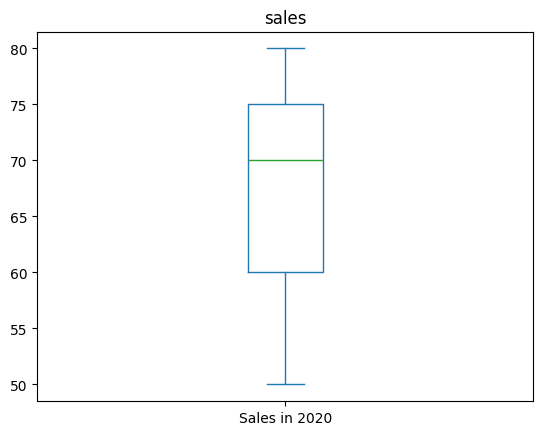

In [ ]:
z.plot("Week","Sales in 2020",kind="box", title="sales")

In [ ]:
print(stu_df)

   roll    name place  marks
0    11  pranav   jal     88
1     7   raman   phg     80
2    25   sumit   kpt     79
3    16   suman   del     99
4    10   nitin   del     15
5     8    amit   jal     10
6    15    aman   jal     40


### Line Graph
A line plot is ideal for visualizing trends over time or continuous data.

<Axes: title={'center': 'Unemployment Rate Over Years'}, xlabel='Year'>

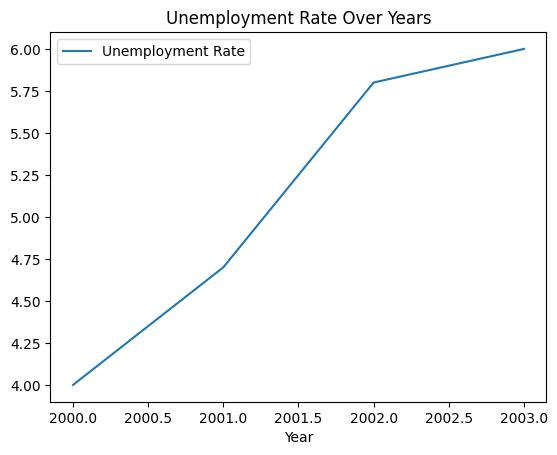

In [ ]:
# Sample DataFrame
data = {'Year': [2000, 2001, 2002, 2003],
       'Unemployment Rate': [4.0, 4.7, 5.8, 6.0]}
df = pd.DataFrame(data)
# Line plot
df.plot(x='Year', y='Unemployment Rate', kind='line', title='Unemployment Rate Over Years')

<Axes: title={'center': 'Student wise marks'}, xlabel='name'>

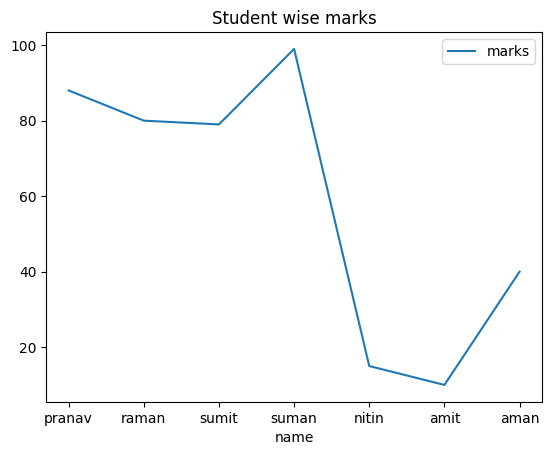

In [ ]:
stu_df.plot(x='name', y='marks', kind='line', title="Student wise marks")

### Bar Graph (Vertical)
Bar plots are great for comparing categorical data.

<Axes: title={'center': 'Scores by Name'}, xlabel='Name'>

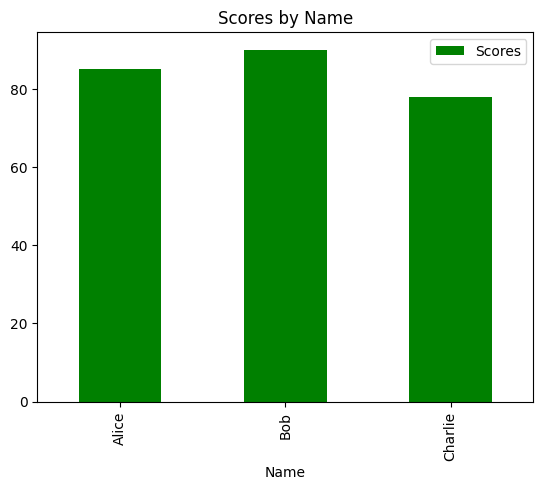

In [ ]:
data = {'Name': ['Alice', 'Bob', 'Charlie'],
       'Scores': [85, 90, 78]}
df = pd.DataFrame(data)
# Bar plot
df.plot(kind='bar', x='Name', y='Scores', color='green', title='Scores by Name')

<Axes: title={'center': 'Student wise marks'}, xlabel='name'>

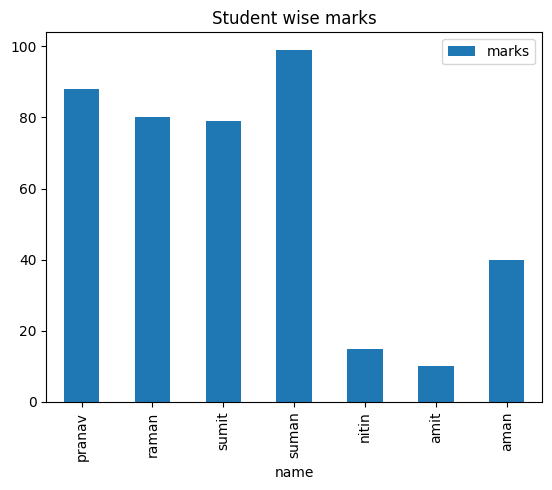

In [ ]:
stu_df.plot(x='name', y='marks', kind='bar', title="Student wise marks")

### Bar Graph (Horizontal)
Bar plots are great for comparing categorical data.

<Axes: title={'center': 'Student wise marks'}, ylabel='name'>

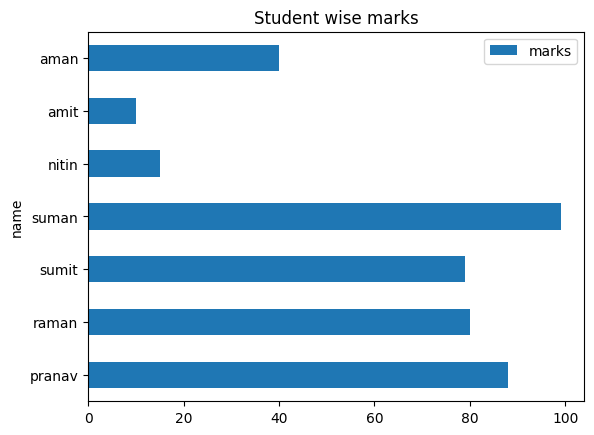

In [ ]:
stu_df.plot(x='name', y='marks', kind='barh', title="Student wise marks")

### Scatter Plot
Scatter plots are used to visualize relationships between two variables.

<Axes: title={'center': 'Math vs Physics Marks'}, xlabel='Math Marks', ylabel='Physics Marks'>

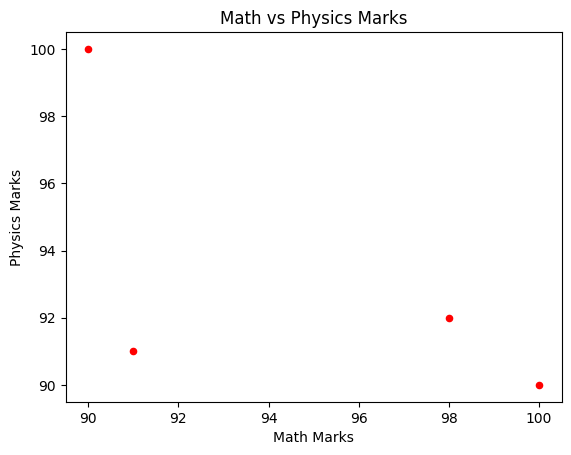

In [ ]:
data = {'Math Marks': [100, 90, 91, 98],
       'Physics Marks': [90, 100, 91, 92]}
df = pd.DataFrame(data)
# Scatter plot
df.plot(kind='scatter', x='Math Marks', y='Physics Marks', color='red', title='Math vs Physics Marks')

### Box Plot
Box plots help identify outliers and visualize distributions.

<Axes: title={'center': 'Marks Distribution'}>

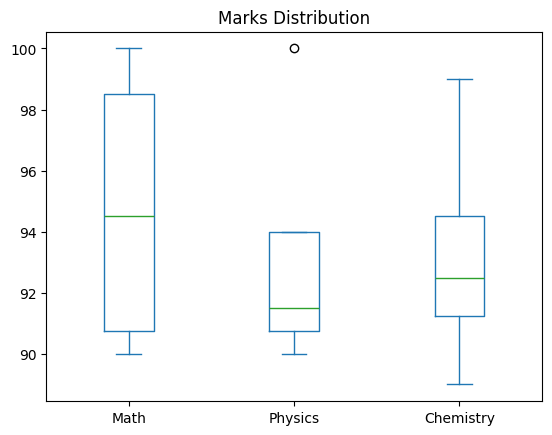

In [ ]:
data = {'Math': [100, 90, 91, 98],
       'Physics': [90, 100, 91, 92],
       'Chemistry': [93, 89, 99, 92]}
df = pd.DataFrame(data)
# Box plot (vertical - default)
df.plot(kind='box', title="Marks Distribution")
# or
df.plot.box(title="Marks Distribution")

In [ ]:
# Box plot (horizontal)
df.plot(kind='box', vert=False, title="Marks Distribution")

### Area Plot
An area plot is an extension of a line chart that fills the region between the line chart and the x-axis with a color.

In [ ]:
data = {'Math': [100, 90, 91, 98],
       'Physics': [90, 100, 91, 92],
       'Chemistry': [93, 89, 99, 92]}
df = pd.DataFrame(data)
# Area plot (Stacked)
df.plot(kind='area')

In [ ]:
# Area plot non-stacked
df.plot(kind='area', stacked=False)

### Pie Chart
Pie charts are useful for showing proportions.

array([<Axes: ylabel='Values'>], dtype=object)

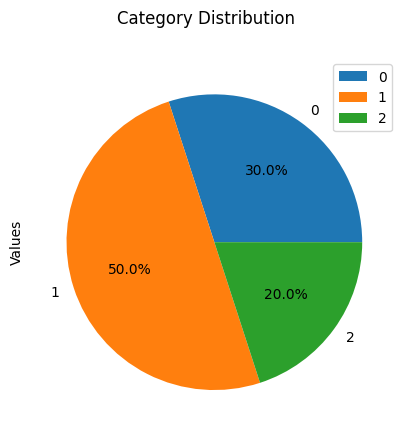

In [ ]:
data = {'Values':[30, 50, 20]}
df = pd.DataFrame(data)
# Pie chart
df.plot(kind='pie', autopct='%1.1f%%', title="Category Distribution", subplots=True)

<Axes: title={'center': 'Category Distribution'}, ylabel='Values'>

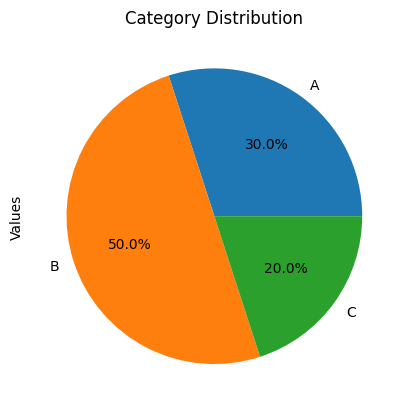

In [ ]:
data = {'Category': ['A', 'B', 'C'],
       'Values': [30, 50, 20]}
df = pd.DataFrame(data)
# Pie chart
df.set_index('Category')['Values'].plot(kind='pie', autopct='%1.1f%%', title="Category Distribution")

### Histogram

<Axes: title={'center': 'Distribution of Student Marks'}, ylabel='Frequency'>

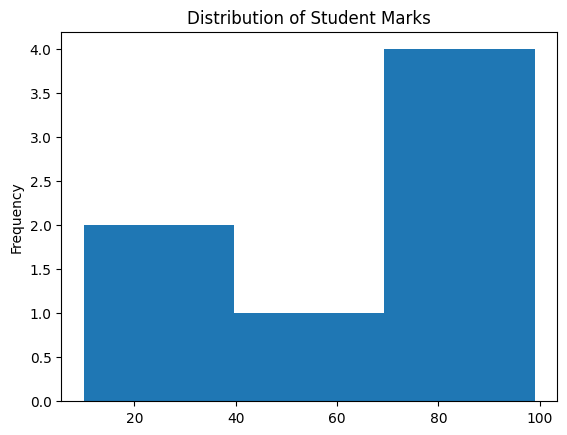

In [ ]:
stu_df['marks'].plot(kind='hist', bins=3, title='Distribution of Student Marks')

### Hexbin Plot
When the data is very dense, a hexagon bin plot, also known as a hexbin plot, can be an alternative to a scatter plot. In other words, when the number of data points is enormous, and each data point can't be plotted separately, it's better to use this kind of plot that represents data in the form of a honeycomb. Also, the color of each hexbin defines the density of data points in that range.

<Axes: xlabel='Math', ylabel='Physics'>

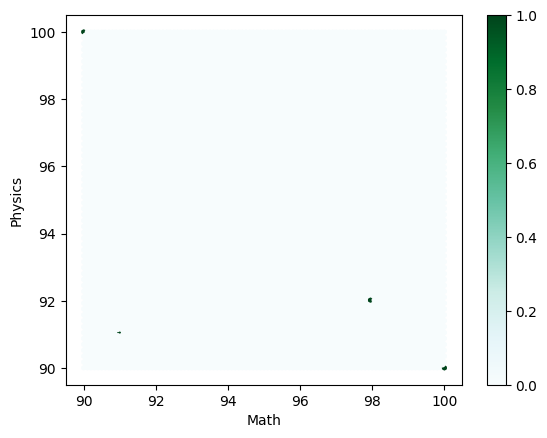

In [ ]:
import pandas as pd
data = {'Math': [100, 90, 91, 98],
       'Physics': [90, 100, 91, 92],
       'Chemistry': [93, 89, 99, 92]}
df = pd.DataFrame(data)
# Hexbin plot
df.plot(kind='hexbin', x='Math', y='Physics')

### KDE Plot
The last plot we want to discuss in this tutorial is the Kernel Density Estimate, also known as KDE, which visualizes the probability density of a continuous and non-parametric data variable.

<Axes: ylabel='Density'>

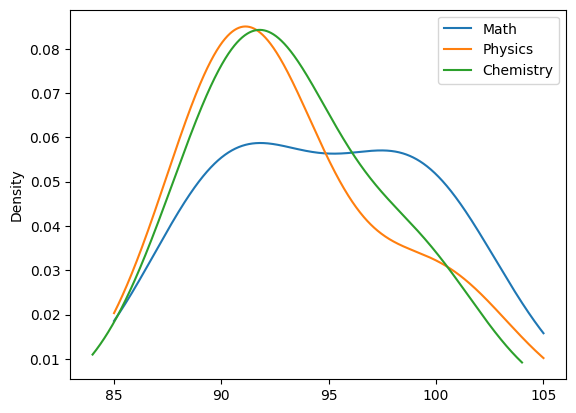

In [ ]:
data = {'Math': [100, 90, 91, 98],
       'Physics': [90, 100, 91, 92],
       'Chemistry': [93, 89, 99, 92]}
df = pd.DataFrame(data)
#KDE plot
df.plot(kind='kde')

<Axes: ylabel='Density'>

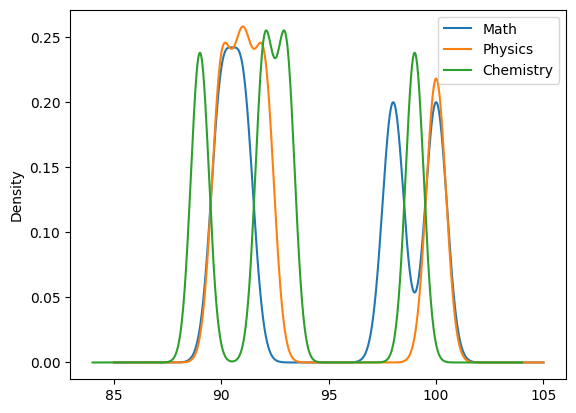

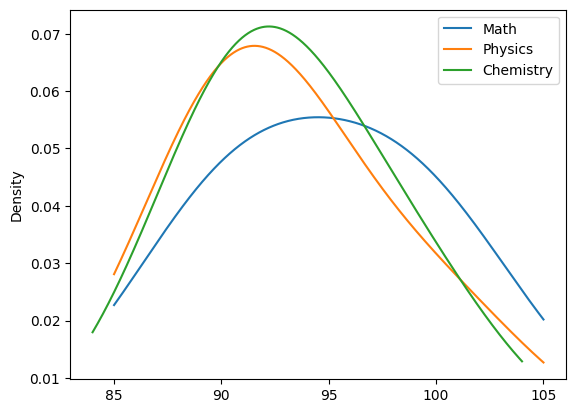

In [ ]:
# We can also specify the bandwidth that affects the plot smoothness in the KDE plot, like this:

# bandwidth=0.1
df.plot(kind='kde', bw_method=0.1)
# bandwidth=1
df.plot(kind='kde', bw_method=1)

In [ ]:
import pandas as pd

In [ ]:
d={"Week":[1,2,3,4,5],"Sales":[10,20,30,15,35]}
z=pd.DataFrame(d)

<Axes: title={'center': 'graph'}, ylabel='Week'>

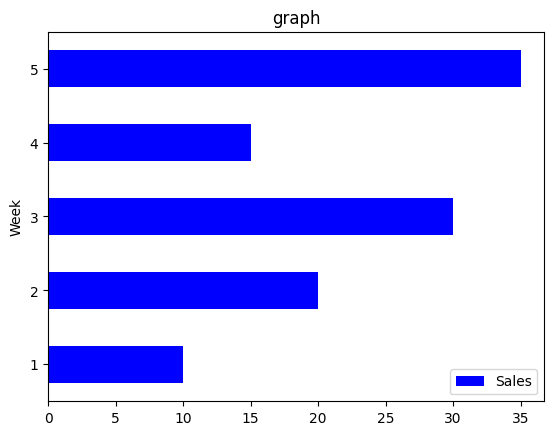

In [ ]:
z.plot("Week","Sales",kind="barh",title="graph", color="b")